In [8]:
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import coint

### Download Historical Stock Data

In [15]:
# Download stock data for AAPL and MSFT from 2014 to 2024
aapl_data = yf.download("AAPL", start="2014-01-01", end="2024-01-01")
msft_data = yf.download("MSFT", start="2014-01-01", end="2024-01-01")

# Focus on the adjusted closing price for both stocks
aapl_close = aapl_data['Adj Close']
msft_close = msft_data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


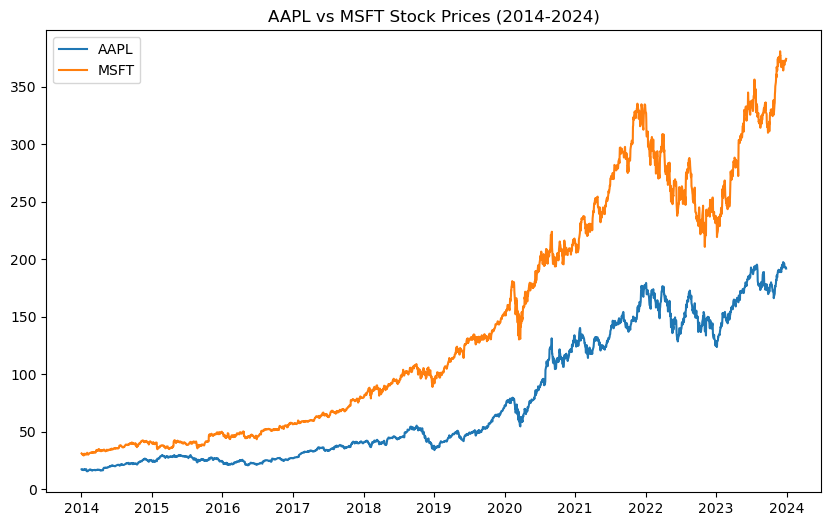

In [16]:

plt.figure(figsize=(10, 6))
plt.plot(aapl_close, label='AAPL')
plt.plot(msft_close, label='MSFT')
plt.title('AAPL vs MSFT Stock Prices (2014-2024)')
plt.legend()
plt.show()

### The Cointegration Test: Engle-Granger Two-Step Method

The most common cointegration test is the Engle-Granger test, which is a two-step process.

**Step 1: Estimate the Long-Run Relationship**

The first step is to run a simple linear regression between the two time series. For example, if we have two stock price series $P_A$ (AAPL) and $P_M$​ (MSFT), we fit the following regression model:
$$
P_A(t)=α+βP_M(t)+ϵ(t)
$$

Where:
* $P_A(t)$ is the price of stock AAPL at time $t$,
* $P_M(t)$ is the price of stock MSFT at time $t$,
* $α$ is the intercept,
* $β$ is the hedge ratio or coefficient,
* $ϵ(t)$ is the residual, or the difference between the observed and predicted prices of AAPL.

In pairs trading, this residual, $ϵ(t)$, is effectively the "spread" between the two stocks.

**Step 2: Test the Residual for Stationarity**

After estimating the hedge ratio ($β$) and obtaining the residuals $ϵ(t)$, the next step is to check whether the residuals are stationary. This is done using the Augmented Dickey-Fuller (ADF) test.
* If the residuals are stationary, it means the two series are cointegrated. Even if the stock prices themselves are non-stationary, their spread reverts to a mean over time.
* If the residuals are not stationary, the two series are not cointegrated, meaning their relationship is not stable, and they may drift apart indefinitely.

We can perform the Engle-Granger test in Python using the `coint` function from `statsmodels`.

In [18]:
score, p_value, _ = coint(aapl_close, msft_close)

The p-value is the key output of the cointegration test.
* If the p-value is below a certain threshold (commonly 0.05), we reject the null hypothesis of no cointegration, meaning the series are cointegrated.
* If the p-value is above the threshold, we accept the null hypothesis, meaning the series are not cointegrated.

Null and Alternative Hypotheses:
* Null Hypothesis ($H_0$): There is no cointegration between the time series (the spread is not stationary)
* Alternative Hypothesis ($H_1$): There is cointegration between the time series (the spread is stationary)

In [20]:
print(f"Cointegration Test p-value: {p_value}")

Cointegration Test p-value: 0.1335355783469518


The p-value is 0.13354 (5 d.p.), indicating weak cointegration between AAPL and MSFT.

